6
4.1047121174086465 3.977636704461952


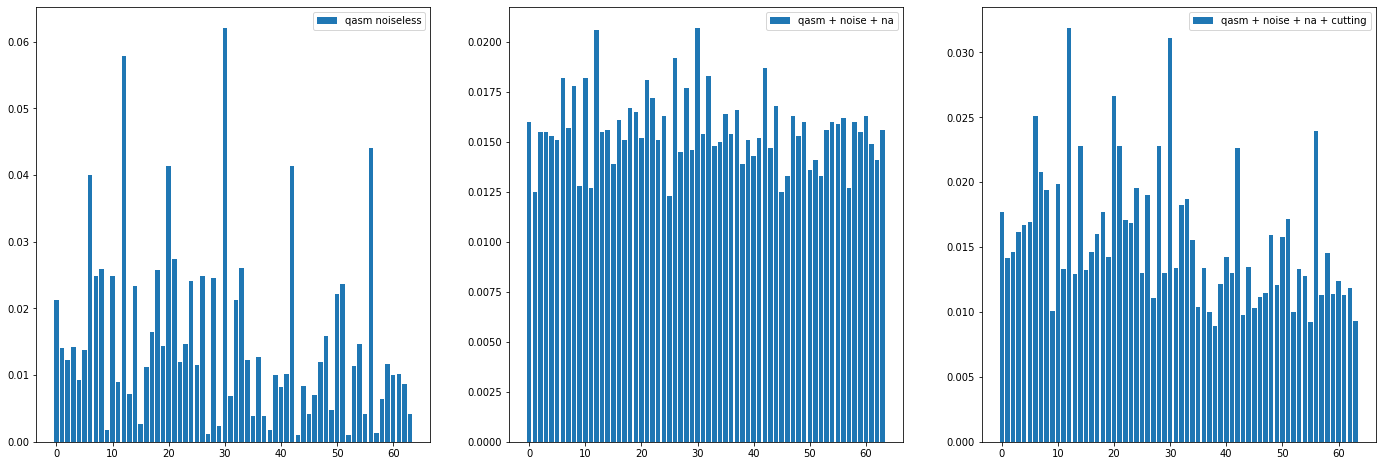

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def cross_entropy(target,obs):
    assert len(target)==len(obs)
    alpha = 1e-4
    if 0 in obs:
        obs = [(x+alpha)/(1+alpha*len(obs)) for x in obs]
    assert abs(sum(obs)-1)<1e-3
    h = 0
    for p,q in zip(target,obs):
        if p==0:
            h += 0
        else:
            assert q>=0
            h += -p*np.log(q)
    return h

filename = 'noisy_benchmark_10000_shots_5_qubits_max_6_clusters'
noisy_benchmark = pickle.load(open('./noisy_benchmark_data/%s.p'%filename, 'rb' ))
num_qubits,times,sv_noiseless_fc_l,qasm_noiseless_fc_l,qasm_noisy_fc_l,qasm_noisy_na_fc_l,qasm_noisy_na_cutting_l = noisy_benchmark

idx = 0
d1 = qasm_noiseless_fc_l[idx]
d2 = qasm_noisy_na_fc_l[idx]
d3 = qasm_noisy_na_cutting_l[idx]
print(num_qubits[idx])
print(cross_entropy(d1,d2),cross_entropy(d1,d3))
x = np.arange(len(d1))

plt.figure(figsize=(24,8))
plt.subplot(131)
plt.bar(x,height=d1,label='qasm noiseless')
plt.legend()
plt.subplot(132)
plt.bar(x,height=d2,label='qasm + noise + na')
plt.legend()
plt.subplot(133)
plt.bar(x,height=d3,label='qasm + noise + na + cutting')
plt.legend()
plt.savefig('benchmark.png')